# <p style="color:green">Lead Score Case Study</p>

#### <p style="color:red">Problem Statement</p>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. We need to 
- build a model to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 
- The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

In [1]:
# Importing

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset

leads = pd.read_csv("leads.csv")
print(leads.shape)
leads.head()

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data cleaning

In [3]:
leads.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
round((leads.isnull().sum().sort_values(ascending=False)/len(leads))*100,2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

So, here we can see lots of missing values across all columns. But before dropping these data's we have to once again make it confirm. Because, in our dataset, we have the term "SELECT" in certain features, which implies the customers are not filled that particular query. SO, we have to take that also as our null values.

In [5]:
col = list(leads.columns)

for i in col:
    leads[i] = leads[i].apply(lambda j: np.nan if j=='Select' else j)

In [6]:
round((leads.isnull().sum().sort_values(ascending=False)/len(leads))*100,2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

Now its the time to treat the missing values

In [7]:
round((leads.isnull().sum(axis=1).sort_values(ascending=False)/leads.shape[1])*100,2)

5840    40.54
2942    37.84
3928    37.84
4619    35.14
5322    35.14
        ...  
8343     0.00
2514     0.00
2513     0.00
8744     0.00
1857     0.00
Length: 9240, dtype: float64

Now, we can drop the rows which having more than 30 percent of the values missing

In [8]:
leads = leads[-(round((leads.isnull().sum(axis=1).sort_values(ascending=False)/leads.shape[1])*100,2) > 30)]
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
round((leads.isnull().sum().sort_values(ascending=False)/len(leads))*100,2)

How did you hear about X Education               76.77
Lead Profile                                     72.16
Lead Quality                                     47.92
Asymmetrique Profile Score                       41.39
Asymmetrique Activity Score                      41.39
Asymmetrique Profile Index                       41.39
Asymmetrique Activity Index                      41.39
City                                             34.98
Specialization                                   31.64
Tags                                             31.56
What matters most to you in choosing a course    24.08
What is your current occupation                  23.86
Country                                          23.66
TotalVisits                                       1.32
Page Views Per Visit                              1.32
Last Activity                                     0.95
Lead Source                                       0.37
Lead Origin                                       0.00
Lead Numbe

Now we can go by column wise dropping . Initially we can drop the 2 most missing features having more than 70 percent 

In [10]:
leads = leads.drop(['How did you hear about X Education','Lead Profile'],axis=1)

In [11]:
round((leads.isnull().sum().sort_values(ascending=False)/len(leads))*100,2)

Lead Quality                                     47.92
Asymmetrique Profile Score                       41.39
Asymmetrique Activity Score                      41.39
Asymmetrique Profile Index                       41.39
Asymmetrique Activity Index                      41.39
City                                             34.98
Specialization                                   31.64
Tags                                             31.56
What matters most to you in choosing a course    24.08
What is your current occupation                  23.86
Country                                          23.66
TotalVisits                                       1.32
Page Views Per Visit                              1.32
Last Activity                                     0.95
Lead Source                                       0.37
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted 

In [12]:
leads['Lead Quality'].value_counts()

Might be             1555
Not Sure             1092
High in Relevance     631
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

Although we dont need this feature, and we having missing value also. Also, the Asymmetrique features have no use for our modelling purpose. So, lets drop these items.

In [13]:
leads = leads.drop(['Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis=1)

In [14]:
round((leads.isnull().sum().sort_values(ascending=False)/len(leads))*100,2)

City                                             34.98
Specialization                                   31.64
Tags                                             31.56
What matters most to you in choosing a course    24.08
What is your current occupation                  23.86
Country                                          23.66
TotalVisits                                       1.32
Page Views Per Visit                              1.32
Last Activity                                     0.95
Lead Source                                       0.37
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [15]:
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
leads.drop('City',axis=1,inplace = True)

We dropped the `City` feature. Because it makes no sense for our analyze purpose due to the details belonging to only Maharastra.

In [17]:
leads['Specialization'].value_counts()

Finance Management                   975
Human Resource Management            848
Marketing Management                 837
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               113
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [18]:
leads['Specialization'] = leads['Specialization'].fillna('Others') 

Here, its not good to drop this features, because this is our important feature for our model.So lets assume the unknown or null value as 'Others

In [19]:
leads['Tags'].value_counts()

Will revert after reading the email                  2071
Ringing                                              1202
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    339
switched off                                          240
Busy                                                  186
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [20]:
leads['Tags'] = leads['Tags'].fillna('Other')

Here, its not good to drop this feature, because it delivers the details after our lead

In [21]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6502
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

This feature is not at all usefull for our model as well as it is skewed in nature. So, its better to drop it

In [22]:
leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [23]:
leads['What is your current occupation'].value_counts()

Unemployed              5575
Working Professional     705
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Other')

Fix all null or missing values as `Other`, because it uses further

In [25]:
leads['Country'].value_counts()

India                   6264
United States             65
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
South Africa               4
Canada                     4
Kuwait                     4
Nigeria                    4
Germany                    4
Sweden                     3
Netherlands                2
China                      2
Bangladesh                 2
unknown                    2
Ghana                      2
Uganda                     2
Philippines                2
Belgium                    2
Kenya                      1
Sri Lanka                  1
Vietnam                    1
Indonesia                  1
Denmark                    1
Malaysia                   1
Tanzania                   1
Liberia                    1
Switzerland   

Here, the feature `Country` is fully skewed and makes no sense for our modelling. Better drop it

In [26]:
leads.drop('Country',axis=1,inplace=True)

In [27]:
leads['TotalVisits'].value_counts()

0.0      1791
2.0      1592
3.0      1248
4.0      1089
5.0       771
6.0       455
1.0       370
7.0       301
8.0       219
9.0       163
10.0      111
11.0       83
13.0       47
12.0       45
14.0       36
16.0       20
15.0       18
18.0       15
17.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        4
25.0        4
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

Here, we have to handle it carefully. Because it may affect away our model.

In [28]:
leads['TotalVisits'].describe()

count    8455.000000
mean        3.604258
std         4.951645
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

From here, it is clear that, the data's are in an normal form...So, we can replace the missing values as our `median` value.

In [29]:
leads['TotalVisits'].fillna(leads['TotalVisits'].median(),inplace=True)

In [30]:
leads['TotalVisits'].value_counts()

0.0      1791
2.0      1592
3.0      1361
4.0      1089
5.0       771
6.0       455
1.0       370
7.0       301
8.0       219
9.0       163
10.0      111
11.0       83
13.0       47
12.0       45
14.0       36
16.0       20
15.0       18
18.0       15
17.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        4
25.0        4
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [31]:
leads['Page Views Per Visit'].value_counts()

0.00    1791
2.00    1721
3.00    1166
4.00     883
1.00     593
        ... 
8.21       1
1.64       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 110, dtype: int64

In [32]:
leads['Page Views Per Visit'].describe()

count    8455.000000
mean        2.476506
std         2.156013
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

We can replace the missing values as median. 

In [33]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(),inplace=True)

In [34]:
leads['Last Activity'].value_counts()

Email Opened                    3249
SMS Sent                        2631
Olark Chat Conversation          756
Page Visited on Website          597
Converted to Lead                391
Email Bounced                    303
Email Link Clicked               247
Form Submitted on Website        115
Unreachable                       91
Unsubscribed                      57
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [35]:
leads['Last Activity'].fillna('Other',inplace=True)
leads['Last Activity'].value_counts()

Email Opened                    3249
SMS Sent                        2631
Olark Chat Conversation          756
Page Visited on Website          597
Converted to Lead                391
Email Bounced                    303
Email Link Clicked               247
Form Submitted on Website        115
Unreachable                       91
Other                             81
Unsubscribed                      57
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [36]:
leads['Lead Source'].value_counts()

Google               2711
Direct Traffic       2514
Olark Chat           1348
Organic Search       1105
Reference             516
Welingak Website      138
Referral Sites        124
Facebook               55
google                  5
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
NC_EDM                  1
blog                    1
youtubechannel          1
welearnblog_Home        1
testone                 1
WeLearn                 1
Name: Lead Source, dtype: int64

In [37]:
leads['Lead Source'].fillna('Other',inplace=True)
leads['Lead Source'].value_counts()

Google               2711
Direct Traffic       2514
Olark Chat           1348
Organic Search       1105
Reference             516
Welingak Website      138
Referral Sites        124
Facebook               55
Other                  32
google                  5
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
NC_EDM                  1
blog                    1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

In [38]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

###### Now, we have treated all our missing values in the dataset. Its time to prepare the dataset.

## Data Preparation

In [39]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


#### `Skewed Column Treatment`

In [40]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4869
API                        2951
Lead Add Form               692
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Data are divided into so many small chunks. We can combine them for better understanding.

In [41]:
leads['Lead Origin'] = leads['Lead Origin'].replace(['Lead Add Form','Lead Import','Quick Add Form'],'Other')
leads['Lead Origin'].value_counts()

Landing Page Submission    4869
API                        2951
Other                       748
Name: Lead Origin, dtype: int64

In [42]:
leads['Tags'].value_counts()

Other                                                2704
Will revert after reading the email                  2071
Ringing                                              1202
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    339
switched off                                          240
Busy                                                  186
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Here, we are having unwanted labels in small small chunks.So, lets combine it all as `Other`

In [43]:
Tg = list(pd.DataFrame(leads['Tags'].value_counts()[leads['Tags'].value_counts() < 80]).index)
Tg

['Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Want to take admission but has financial problems',
 'Still Thinking',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'Shall take in the next coming month',
 'University not recognized',
 'Recognition issue (DEC approval)']

In [44]:
leads['Tags'] = leads['Tags'].replace(Tg,'Other')
leads['Tags'].value_counts()

Other                                  2923
Will revert after reading the email    2071
Ringing                                1202
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      339
switched off                            240
Busy                                    186
Lost to EINS                            173
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Name: Tags, dtype: int64

In [45]:
leads['Last Activity'].value_counts()

Email Opened                    3249
SMS Sent                        2631
Olark Chat Conversation          756
Page Visited on Website          597
Converted to Lead                391
Email Bounced                    303
Email Link Clicked               247
Form Submitted on Website        115
Unreachable                       91
Other                             81
Unsubscribed                      57
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [46]:
LA = list(pd.DataFrame(leads['Last Activity'].value_counts()[leads['Last Activity'].value_counts() < 100]).index)
LA

['Unreachable',
 'Other',
 'Unsubscribed',
 'Had a Phone Conversation',
 'Approached upfront',
 'View in browser link Clicked',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow']

In [47]:
leads['Last Activity'] = leads['Last Activity'].replace(LA,'Other')
leads['Last Activity'].value_counts()

Email Opened                 3249
SMS Sent                     2631
Olark Chat Conversation       756
Page Visited on Website       597
Converted to Lead             391
Email Bounced                 303
Other                         279
Email Link Clicked            247
Form Submitted on Website     115
Name: Last Activity, dtype: int64

In [48]:
leads['Lead Source'].value_counts()

Google               2711
Direct Traffic       2514
Olark Chat           1348
Organic Search       1105
Reference             516
Welingak Website      138
Referral Sites        124
Facebook               55
Other                  32
google                  5
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
NC_EDM                  1
blog                    1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

In [49]:
LS = list(pd.DataFrame(leads['Lead Source'].value_counts()[leads['Lead Source'].value_counts() < 50]).index)
LS

['Other',
 'google',
 'Click2call',
 'bing',
 'Social Media',
 'Live Chat',
 'Press_Release',
 'Pay per Click Ads',
 'NC_EDM',
 'blog',
 'WeLearn',
 'youtubechannel',
 'welearnblog_Home',
 'testone']

In [50]:
leads['Lead Source'] = leads['Lead Source'].replace(LS,'Other')
leads['Lead Source'].value_counts()

Google              2711
Direct Traffic      2514
Olark Chat          1348
Organic Search      1105
Reference            516
Welingak Website     138
Referral Sites       124
Other                 57
Facebook              55
Name: Lead Source, dtype: int64

In [51]:
leads['Search'].value_counts(normalize=True) * 100

No     99.836601
Yes     0.163399
Name: Search, dtype: float64

In [52]:
leads['Magazine'].value_counts(normalize=True) * 100

No    100.0
Name: Magazine, dtype: float64

In [53]:
leads['Newspaper Article'].value_counts(normalize=True) * 100

No     99.976657
Yes     0.023343
Name: Newspaper Article, dtype: float64

In [54]:
leads['Newspaper'].value_counts(normalize=True) * 100

No     99.988329
Yes     0.011671
Name: Newspaper, dtype: float64

In [55]:
leads['Digital Advertisement'].value_counts(normalize=True) * 100

No     99.953315
Yes     0.046685
Name: Digital Advertisement, dtype: float64

In [56]:
leads['X Education Forums'].value_counts(normalize=True) * 100

No     99.988329
Yes     0.011671
Name: X Education Forums, dtype: float64

In [57]:
leads['Update me on Supply Chain Content'].value_counts(normalize=True) * 100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [58]:
leads['Receive More Updates About Our Courses'].value_counts(normalize=True) * 100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [59]:
leads['Get updates on DM Content'].value_counts(normalize=True) * 100

No    100.0
Name: Get updates on DM Content, dtype: float64

These are the data's is skewed and no use at all...Hence drop these variables

In [60]:
leads['Through Recommendations'].value_counts(normalize=True) * 100

No     99.918301
Yes     0.081699
Name: Through Recommendations, dtype: float64

In [61]:
leads['Do Not Call'].value_counts(normalize=True) * 100

No     99.976657
Yes     0.023343
Name: Do Not Call, dtype: float64

In [62]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [63]:
# Store the lead number for future purpose
Lead_Number = leads['Lead Number']

In [64]:
# Drop Columns
leads.drop(['X Education Forums', 'Digital Advertisement',
         'Newspaper', 'Newspaper Article', 'Search', 'Magazine',
         'Update me on Supply Chain Content', 'Through Recommendations',
         'Receive More Updates About Our Courses','Do Not Call','Get updates on DM Content'], axis=1, inplace=True)

` Unwanted Columns`

In [65]:
# Drop Columns
leads.drop(['Last Notable Activity','Prospect ID', 'Lead Number', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], axis=1, inplace=True)

`Rename` the column names in shortest and concise form for better readability.

In [66]:
leads.columns = ['Lead Origin','Lead Source','Do Not Email','Converted','TotalVisits',
                'Time spent','Page views','Last Activity','Specialization','Occupation',
                 'Tags']

In [67]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time spent,Page views,Last Activity,Specialization,Occupation,Tags
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email


### Exploratory Data Analysis

In [68]:
col = list(leads.columns)
col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'TotalVisits',
 'Time spent',
 'Page views',
 'Last Activity',
 'Specialization',
 'Occupation',
 'Tags']

In [69]:
num_col = list(leads.describe().columns)
num_col

['Converted', 'TotalVisits', 'Time spent', 'Page views']

In [70]:
cat_col = list(leads.select_dtypes('object').columns)
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'Occupation',
 'Tags']

### `Univariate Analysis`

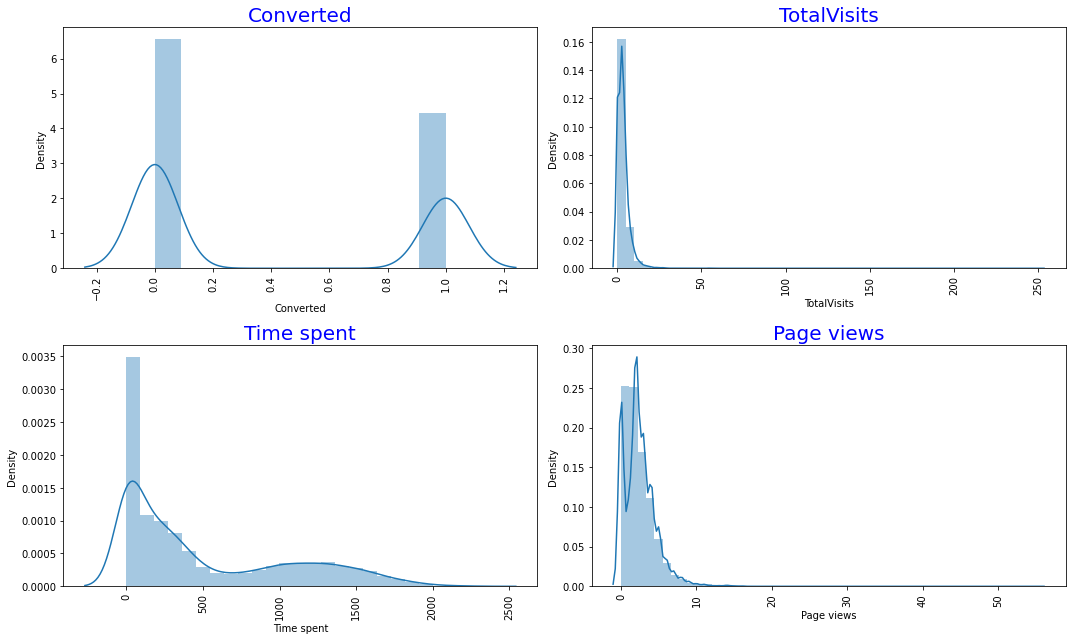

In [71]:
# Distribution plot
plt.figure(figsize=[15,9])

n = 1
for i in num_col:
    plt.subplot(2,2,n)
    sns.distplot(leads[i])
    plt.title(i,fontsize=20,color='Blue')
    plt.xticks(rotation=90)
    n += 1
    
plt.tight_layout()
plt.show()
    

Mostly the graphs are normally distributed.

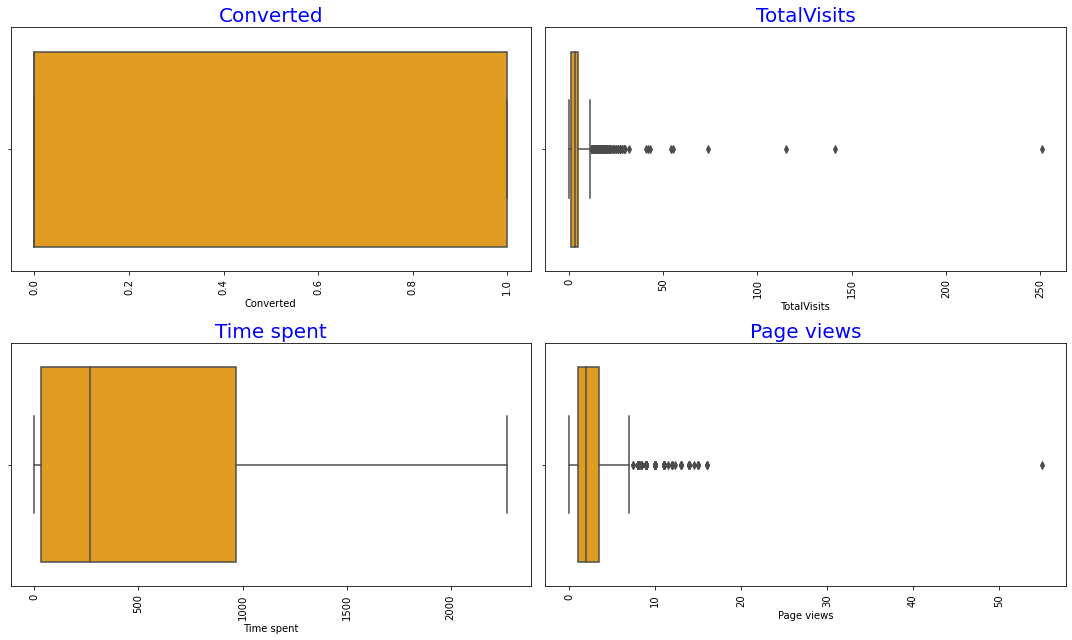

In [72]:
# Bar plot
plt.figure(figsize=[15,9])

n = 1
for i in num_col:
    plt.subplot(2,2,n)
    sns.boxplot(leads[i],color='orange')
    plt.title(i,fontsize=20,color='Blue')
    plt.xticks(rotation=90)
    n += 1
    
plt.tight_layout()
plt.show()
    

Here, we have some outliers in `page views` and `Total visits` features.So, we have to treat these outliers carefully. lets move on there for treatment.

In [73]:
leads['TotalVisits'].describe(percentiles=[0,0.5,0.75,0.90,0.95,0.96,0.98,0.99,0.999,1])

count    8568.000000
mean        3.596289
std         4.919363
min         0.000000
0%          0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
96%        11.000000
98%        13.000000
99%        17.000000
99.9%      35.897000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [74]:
leads['TotalVisits'] = leads['TotalVisits'].apply(lambda i: 11 if i>11 else i)

Now we have cleared the outliers in `TotalVisits` column and its ready for analyze.

In [75]:
leads['Page views'].describe(percentiles=[0,0.5,0.75,0.90,0.95,0.96,0.97,0.99,0.999,1])

count    8568.000000
mean        2.470222
std         2.142437
min         0.000000
0%          0.000000
50%         2.000000
75%         3.500000
90%         5.000000
95%         6.000000
96%         6.500000
97%         7.000000
99%         9.000000
99.9%      14.216500
100%       55.000000
max        55.000000
Name: Page views, dtype: float64

In [76]:
leads['Page views'] = leads['Page views'].apply(lambda i: 7 if i>7 else i)

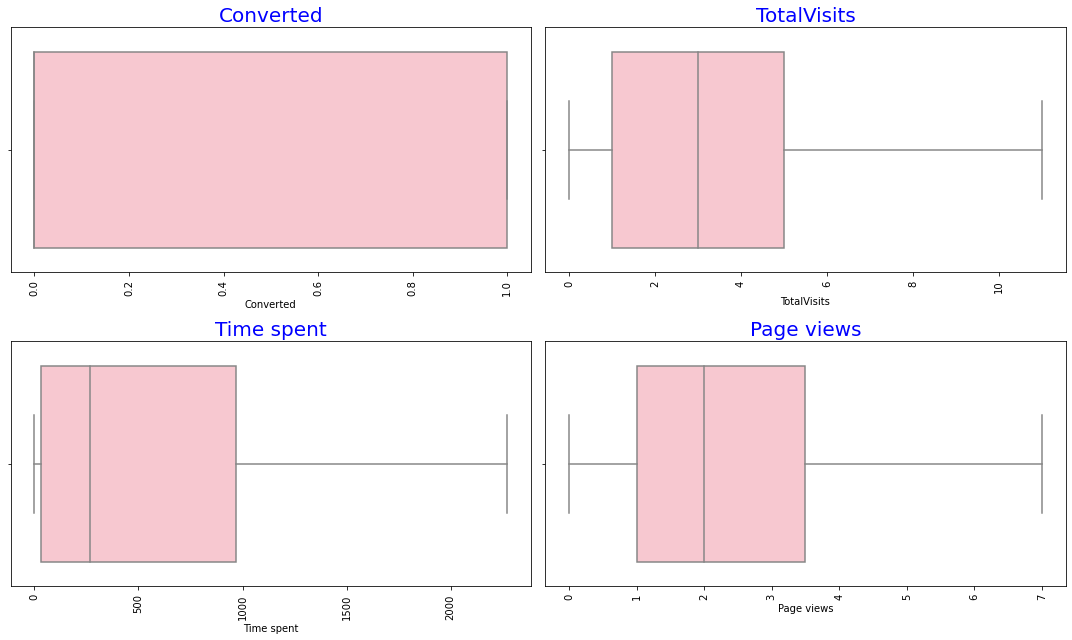

In [77]:
# Bar plot
plt.figure(figsize=[15,9])

n = 1
for i in num_col:
    plt.subplot(2,2,n)
    sns.boxplot(leads[i],color='Pink')
    plt.title(i,fontsize=20,color='Blue')
    plt.xticks(rotation=90)
    n += 1
    
plt.tight_layout()
plt.show()
    

Now, we have totally vanished our outliers in all features.It is ready for further stages.Lets move on....

### `Bivariate Analysis`

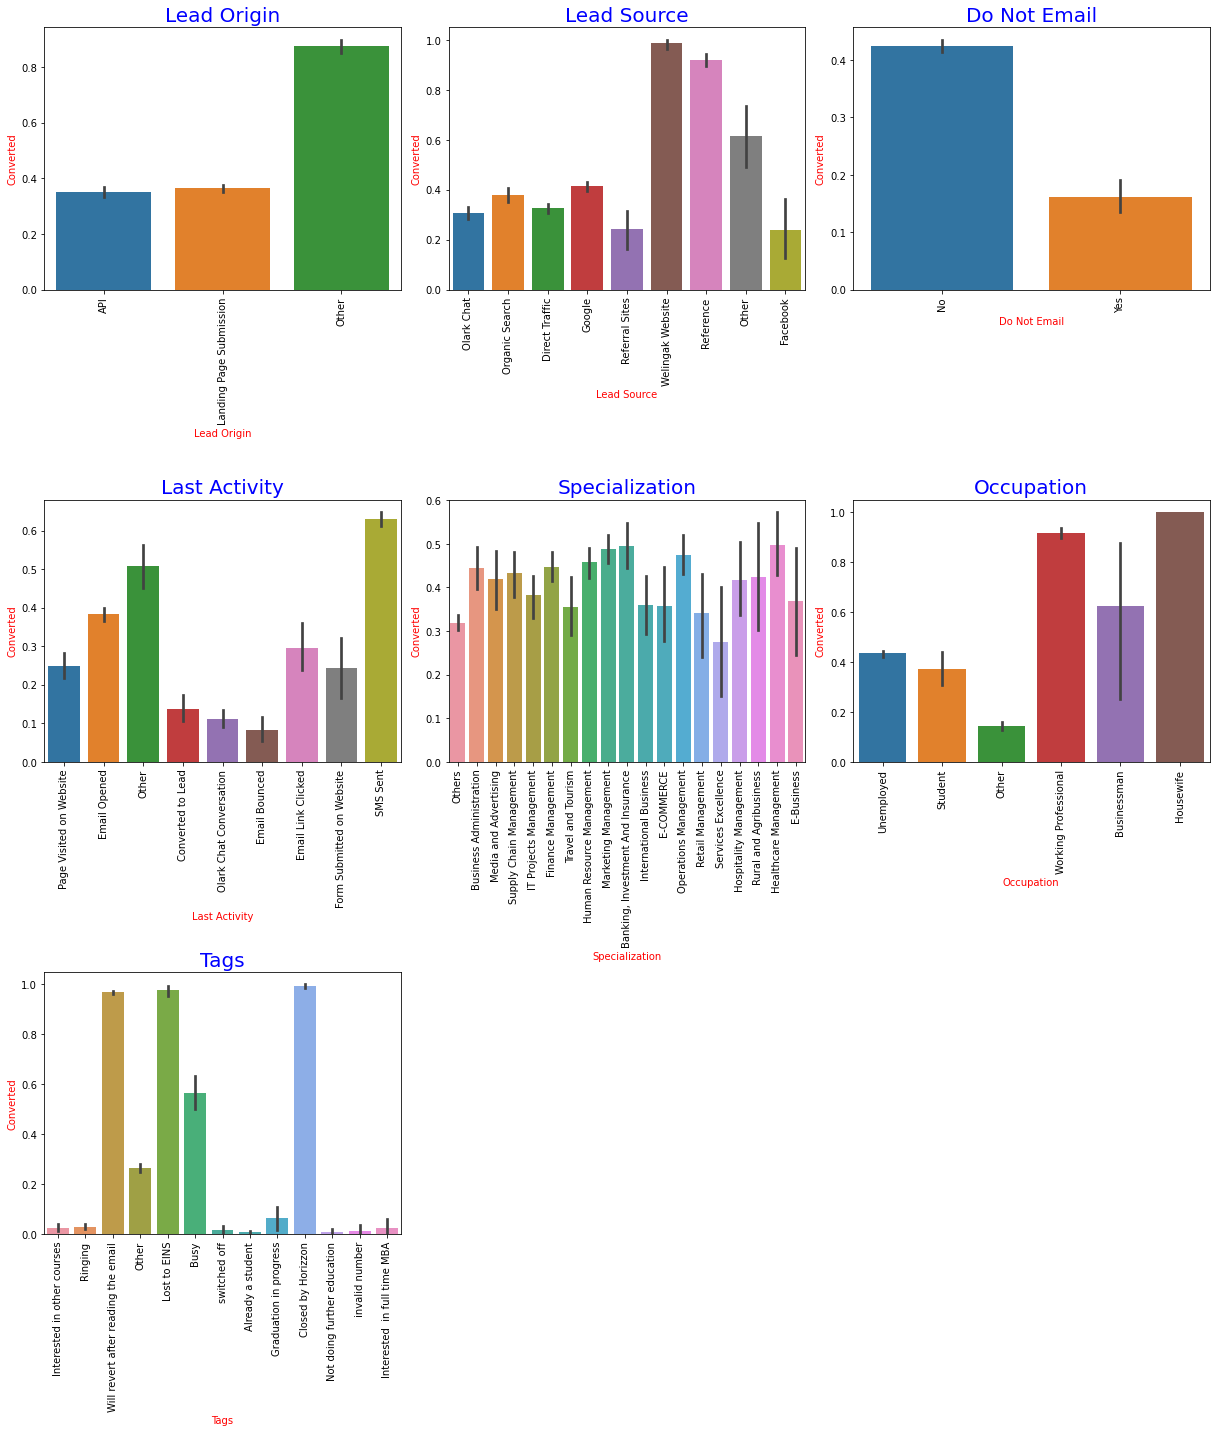

In [78]:
# Categorical vs Converted variables
plt.figure(figsize=[17,20])
n = 1

for i in cat_col:
    plt.subplot(3,3,n)
    sns.barplot(data=leads,x=i,y='Converted')
    plt.title(i,fontsize=20,color='Blue')
    plt.xlabel(i,color='red')
    plt.ylabel('Converted',color='red')
    plt.xticks(rotation=90)
    n += 1
    
plt.tight_layout()
plt.show()

##### `Fruitfull insights`
- Large amount of customers are converted into the course through their `references`.
- Majority of the clients are converted by seeing the profile or details provided by the company through `Email` only.
- `Banking` and `Healthcare management` domain experienced customers are mostly get converted here.
- The surprise here is most of the housewife's are willing to join the courses.

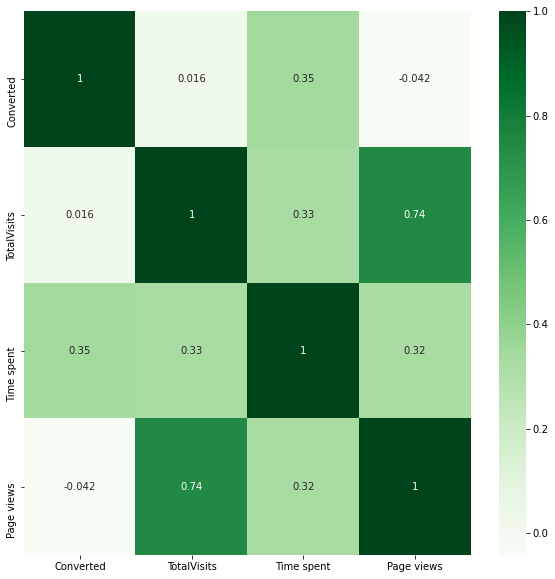

In [79]:
plt.figure(figsize=[10,10])
sns.heatmap(leads.corr(),annot=True,cmap='Greens')
plt.show()

From the plot above, it strongly implies that, if the customer viewed more pages, the probability to get converted gets highly decreased.

### `Create Dummy variables`

In [80]:
df1 = pd.get_dummies(leads['Lead Origin'],prefix='Lead Origin').drop('Lead Origin_Other',1)
leads = pd.concat([leads,df1],1)

df2 = pd.get_dummies(leads['Lead Source'],prefix='Lead Source').drop('Lead Source_Other',1)
leads = pd.concat([leads,df2],1)

df3 = pd.get_dummies(leads['Do Not Email'],prefix='Do Not Email').drop('Do Not Email_Yes',1)
leads = pd.concat([leads,df3],1)

df4 = pd.get_dummies(leads['Last Activity'],prefix='Last Activity').drop('Last Activity_Other',1)
leads = pd.concat([leads,df4],1)

df5 = pd.get_dummies(leads['Specialization'],prefix='Specialization').drop('Specialization_Others',1)
leads = pd.concat([leads,df5],1)

df6 = pd.get_dummies(leads['Occupation'],prefix='Occupation').drop('Occupation_Other',1)
leads = pd.concat([leads,df6],1)

df7 = pd.get_dummies(leads['Tags'],prefix='Tags').drop('Tags_Other',1)
leads = pd.concat([leads,df7],1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time spent,Page views,Last Activity,Specialization,Occupation,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,1,0,0


Now, drop those unwanted variables from our dataset.

In [81]:
leads.drop(['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','Occupation','Tags'],axis=1,inplace=True)

In [82]:
leads.head()

,Converted,TotalVisits,Time spent,Page views,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
0,0,0.0,0,0.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
leads.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         8568 non-null   int64  
 1   TotalVisits                                       8568 non-null   float64
 2   Time spent                                        8568 non-null   int64  
 3   Page views                                        8568 non-null   float64
 4   Lead Origin_API                                   8568 non-null   uint8  
 5   Lead Origin_Landing Page Submission               8568 non-null   uint8  
 6   Lead Source_Direct Traffic                        8568 non-null   uint8  
 7   Lead Source_Facebook                              8568 non-null   uint8  
 8   Lead Source_Google                                8568 non-null   uint8  
 9   Lead Source_Olark C

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
train_df,test_df = train_test_split(leads,test_size=0.30,random_state=100)
print(train_df.shape)
print(test_df.shape)

(5997, 58)
(2571, 58)


In [86]:
train_df

,Converted,TotalVisits,Time spent,Page views,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
408,0,2.0,250,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4997,1,3.0,370,3.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6574,0,6.0,280,3.0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4339,0,5.0,167,2.5,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6397,0,2.0,24,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
79,1,3.0,705,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8711,1,4.0,1070,4.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7604,0,2.0,0,2.0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
y_train = train_df['Converted']
x_train = train_df.drop('Converted',1)

### `Scaling` the dataset

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()
x_train[['TotalVisits', 'Time spent', 'Page views']] = scaler.fit_transform(x_train[['TotalVisits', 'Time spent', 'Page views']])
x_train.head()

,TotalVisits,Time spent,Page views,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
408,0.181818,0.110035,0.285714,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0.272727,0.162852,0.428571,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6574,0.545455,0.123239,0.428571,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4339,0.454545,0.073504,0.357143,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6397,0.181818,0.010563,0.285714,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [90]:
list(x_train.describe(include=['float','int64']).columns)

['TotalVisits', 'Time spent', 'Page views']

In [91]:
x_train.head()

,TotalVisits,Time spent,Page views,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
408,0.181818,0.110035,0.285714,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0.272727,0.162852,0.428571,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6574,0.545455,0.123239,0.428571,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4339,0.454545,0.073504,0.357143,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6397,0.181818,0.010563,0.285714,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### `RFE`

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [93]:
LR = LogisticRegression()
rfe = RFE(LR,20)
rfe = rfe.fit(x_train,y_train)

In [94]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 2),
 ('Time spent', True, 1),
 ('Page views', True, 1),
 ('Lead Origin_API', False, 5),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_No', True, 1),
 ('Last Activity_Converted to Lead', False, 10),
 ('Last Activity_Email Bounced', False, 23),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 30),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Page Visited on Website', False, 19),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 20),
 ('Specialization_Bus

In [95]:
x_train = x_train[x_train.columns[rfe.support_]]
x_train.head()

,Time spent,Page views,Lead Source_Welingak Website,Do Not Email_No,Last Activity_Email Opened,Last Activity_SMS Sent,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
408,0.110035,0.285714,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,0.162852,0.428571,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6574,0.123239,0.428571,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4339,0.073504,0.357143,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6397,0.010563,0.285714,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


###  Model Building

In [96]:
import statsmodels.api as sm 

In [97]:
x_train_sm = sm.add_constant(x_train)
log_m1 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
log_m1 = log_m1.fit()

log_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5997
Model:                            GLM   Df Residuals:                     5976
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1141.6
Date:                Mon, 15 Mar 2021   Deviance:                       2283.2
Time:                        00:16:35   Pearson chi2:                 7.06e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.9681      0.297    -16.731      0.000      -5.550      -4.386
Time spent                                   3.8880      0.248     15.701      0.000       3.403       4.373
Page views                                  -1.3559      0.233     -5.826      0.000      -1.812      -0.900
Lead Source_Welingak Website                 4.6487      1.027      4.526      0.000       2.636       6.662
Do Not Email_No                              1.4658      0.259      5.666      0.000       0.959       1.973
Last Activity_Email Opened                   1.0398      0.151      6.902      0.000       0.744       1.335
Last Activity_SMS Sent                       2.2752      0.155     14.652      0.000       1.971       2.580
Occupation_Student                           1.6984      0.502      3.386      0.001       0.715       2.682
Occupation_Unemployed                        2.0338      0.131     15.580      0.000       1.778       2.290
Occupation_Working Professional              2.1471      0.323      6.639      0.000       1.513       2.781
Tags_Already a student                      -4.8270      0.726     -6.646      0.000      -6.251      -3.403
Tags_Closed by Horizzon                      5.2472      0.729      7.200      0.000       3.819       6.676
Tags_Graduation in progress                 -2.1824      0.504     -4.327      0.000      -3.171      -1.194
Tags_Interested  in full time MBA           -3.5586      0.737     -4.829      0.000      -5.003      -2.114
Tags_Interested in other courses            -3.4269      0.384     -8.918      0.000      -4.180      -2.674
Tags_Lost to EINS                            5.7108      1.026      5.566      0.000       3.700       7.722
Tags_Not doing further education            -4.0550      1.023     -3.963      0.000      -6.061      -2.050
Tags_Ringing                                -4.2652      0.254    -16.770      0.000      -4.764      -3.767
Tags_Will revert after reading the email     3.2208      0.186     17.289      0.000       2.856       3.586
Tags_invalid number                         -4.4683      1.140     -3.919      0.000      -6.703      -2.234
Tags_switched off                           -4.2571      0.537     -7.920      0.000      -5.311      -3.204
============================================================================================================
"""

Since the Model seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [99]:
# Create a dataframe that contains the names of all the variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [VIF(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif = vif.sort_values(by = 'VIF',ascending=False)
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,18.06
8,Occupation_Unemployed,2.60
18,Tags_Will revert after reading the email,2.38
9,Occupation_Working Professional,1.98
17,Tags_Ringing,1.83
6,Last Activity_SMS Sent,1.69
5,Last Activity_Email Opened,1.55
10,Tags_Already a student,1.47
14,Tags_Interested in other courses,1.39
7,Occupation_Student,1.35


From our dataframe with `VIF` value, we having all our features below 5. So, no need for dropping any variable further

In [100]:
# Predicted Prob
train_df['Converted_pred'] = log_m1.predict(x_train_sm)
train_df['Converted_pred']

408     0.030414
4997    0.985121
6574    0.008195
4339    0.193772
6397    0.002283
          ...   
350     0.942241
79      0.936114
8711    0.993841
7604    0.004909
6228    0.008835
Name: Converted_pred, Length: 5997, dtype: float64

In [101]:
# Create New Data Frame0
y_train_pred_final = pd.DataFrame(train_df['Converted_pred'])
y_train_pred_final['Lead_Number'] = Lead_Number
y_train_pred_final['Converted'] = train_df['Converted']
y_train_pred_final = y_train_pred_final.reset_index().drop('index',1)
y_train_pred_final = y_train_pred_final[['Lead_Number','Converted','Converted_pred']]
y_train_pred_final

,Lead_Number,Converted,Converted_pred
0,656120,0,0.030414
1,611948,1,0.985121
2,599367,0,0.008195
3,618175,0,0.193772
4,600879,0,0.002283
...,...,...,...
5992,656685,1,0.942241
5993,659710,1,0.936114
5994,583404,1,0.993841
5995,591425,0,0.004909


In [102]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_pred'].apply(lambda i:1 if i>0.5 else 0)
y_train_pred_final

,Lead_Number,Converted,Converted_pred,Predicted
0,656120,0,0.030414,0
1,611948,1,0.985121,1
2,599367,0,0.008195,0
3,618175,0,0.193772,0
4,600879,0,0.002283,0
...,...,...,...,...
5992,656685,1,0.942241,1
5993,659710,1,0.936114,1
5994,583404,1,0.993841,1
5995,591425,0,0.004909,0


#### `Confusion Matrix`

In [103]:
from sklearn import metrics

In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
confusion

array([[3418,  168],
       [ 278, 2133]], dtype=int64)

In [105]:
# Predicted       Not_Converted     Converted
# Actual
# Not_Converted     3418(TN)         168(FP)
# Converted         278(FN)          2133(TP)

#### `Accuracy`

In [106]:
# Model Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

0.9256294814073703

In [107]:
# True Positive
TP = confusion[1,1]

# True Negative
TN = confusion[0,0]

# False Positive
FP = confusion[0,1]

# False Negative
FN = confusion[1,0]

#### `Sensitivity` & `Specificity`

In [108]:
# Sensitivity
TP / float(TP + FN)

0.8846951472418084

In [109]:
# Specificity
TN / float(TN + FP)

0.9531511433351925

In [110]:
# Let's Calculate False Postive Rate (predicting convert rate while customer does not have converted)
FP / float(FP + TN)

0.046848856664807585

In [111]:
# Let's Calculate False Negative Rate (predicting not converted while customer have converted)
FN / float(FN + TP)

0.11530485275819162

In [112]:
# Positive Predictive Value 
TP / float(TP + FP)

0.9269882659713168

In [113]:
# Negative Predictive Value
TN / float(TN + FN)

0.9247835497835498

### `ROC Curve`

**An ROC curve demonstrates several things:**
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate will be the model.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate will be the model.

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(7, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('Receiver Operating Characteristic (ROC)', fontdict={'color':'purple', 'size':15} )
    plt.legend(loc="lower right")
    
    plt.show()

    return None

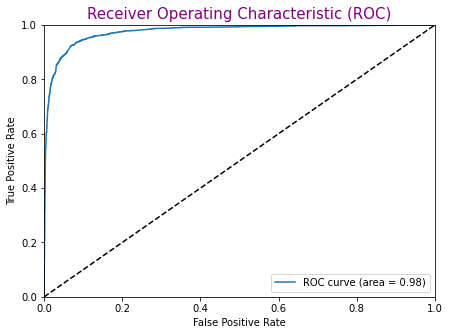

In [115]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])

Now, as per our `ROC` curve, the curve is extremely top left handed towards the y axis. It implies the model is more accurate.. 

### `Optimal Cutoff`

In [116]:
# Let's create columns with different probability cutoffs 
numb = [float(x) / 10 for x in range(10)]

for i in numb:
    y_train_pred_final[i] =  y_train_pred_final['Converted_pred'].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Lead_Number,Converted,Converted_pred,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,656120,0,0.030414,0,1,0,0,0,0,0,0,0,0,0
1,611948,1,0.985121,1,1,1,1,1,1,1,1,1,1,1
2,599367,0,0.008195,0,1,0,0,0,0,0,0,0,0,0
3,618175,0,0.193772,0,1,1,0,0,0,0,0,0,0,0
4,600879,0,0.002283,0,1,0,0,0,0,0,0,0,0,0


In [117]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [float(x) / 10 for x in range(10)]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
    
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.402034,1.000000,0.000000
0.1,0.1,0.871102,0.975529,0.800892
0.2,0.2,0.907287,0.955620,0.874791
0.3,0.3,0.922128,0.940274,0.909927
0.4,0.4,0.925629,0.902945,0.940881
0.5,0.5,0.925629,0.884695,0.953151
0.6,0.6,0.923462,0.866860,0.961517
0.7,0.7,0.912956,0.825384,0.971835
0.8,0.8,0.906620,0.797180,0.980201
0.9,0.9,0.890112,0.746993,0.986336


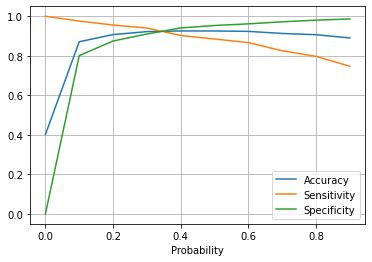

In [118]:
# Let's plot accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.grid()
plt.show()

- From the above curve, 0.34 is the optimum point to take it as a cutoff probability.

In [119]:
y_train_pred_final['Final_predicted'] = y_train_pred_final['Converted_pred'].map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Lead_Number,Converted,Converted_pred,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,656120,0,0.030414,0,1,0,0,0,0,0,0,0,0,0,0
1,611948,1,0.985121,1,1,1,1,1,1,1,1,1,1,1,1
2,599367,0,0.008195,0,1,0,0,0,0,0,0,0,0,0,0
3,618175,0,0.193772,0,1,1,0,0,0,0,0,0,0,0,0
4,600879,0,0.002283,0,1,0,0,0,0,0,0,0,0,0,0


### `Precision & Recall`

In [120]:
# Calculate Precision
Precison = TP / float(TP + FP)
Precison

0.9269882659713168

In [121]:
# Calculate Recall
Recall = TP / float(TP + FN)
Recall

0.8846951472418084

In [122]:
from sklearn.metrics import precision_score, recall_score

In [123]:
# Precision score
precision_score(y_train_pred_final['Converted'], y_train_pred_final['Final_predicted'])

0.8866141732283465

In [124]:
# Recall score
recall_score(y_train_pred_final['Converted'], y_train_pred_final['Final_predicted'])

0.9340522604728329

### `Precison Recall Curve`

In [125]:
from sklearn.metrics import precision_recall_curve

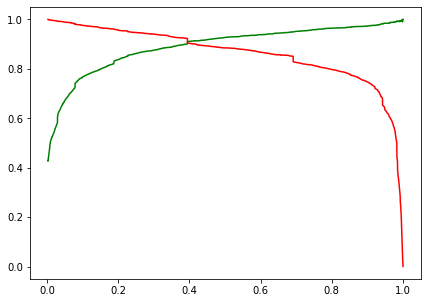

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])

plt.figure(figsize=(7,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Prediction on Test Data

In [127]:
# Scaling Data
test_df[['TotalVisits', 'Time spent', 'Page views']] = scaler.transform(test_df[['TotalVisits', 'Time spent', 'Page views']])

In [128]:
# Create X and y
x_test = test_df.drop(['Converted'], axis=1)
y_test = test_df['Converted']

In [129]:
x_test = x_test[x_test.columns[rfe.support_]]
x_test

,Time spent,Page views,Lead Source_Welingak Website,Do Not Email_No,Last Activity_Email Opened,Last Activity_SMS Sent,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
2269,0.132042,0.571429,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2880,0.001761,0.428571,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8031,0.189701,0.428571,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
496,0.058539,0.714286,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7075,0.192342,0.285714,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7701,0.656250,0.142857,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6082,0.485475,0.607143,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8260,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85,0.147447,0.428571,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [130]:
x_test_sm = sm.add_constant(x_test)

In [131]:
# Making Prediction
test_df['Converted_pred'] = log_m1.predict(x_test_sm)
test_df.head()

,Converted,TotalVisits,Time spent,Page views,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Converted_pred
2269,1,0.363636,0.132042,0.571429,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.977378
2880,0,0.272727,0.001761,0.428571,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.045787
8031,0,0.272727,0.189701,0.428571,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.021228
496,0,0.454545,0.058539,0.714286,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.014157
7075,0,0.181818,0.192342,0.285714,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.005321


In [132]:
# Create New Data Frame
y_test_pred_final = pd.DataFrame(train_df['Converted_pred'])
y_test_pred_final['Lead_Number'] = Lead_Number
y_test_pred_final['Converted'] = train_df['Converted']
y_test_pred_final = y_test_pred_final.reset_index().drop('index',1)
y_test_pred_final = y_test_pred_final[['Lead_Number','Converted','Converted_pred']]
y_test_pred_final

,Lead_Number,Converted,Converted_pred
0,656120,0,0.030414
1,611948,1,0.985121
2,599367,0,0.008195
3,618175,0,0.193772
4,600879,0,0.002283
...,...,...,...
5992,656685,1,0.942241
5993,659710,1,0.936114
5994,583404,1,0.993841
5995,591425,0,0.004909


In [133]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Converted_pred'].map(lambda x: 1 if x > 0.34 else 0)

# Let's see the head
y_test_pred_final.head()

,Lead_Number,Converted,Converted_pred,Final_Predicted
0,656120,0,0.030414,0
1,611948,1,0.985121,1
2,599367,0,0.008195,0
3,618175,0,0.193772,0
4,600879,0,0.002283,0


#### `Confusion Matrix`

In [134]:
# Create Confusion Matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])
confusion

array([[3298,  288],
       [ 159, 2252]], dtype=int64)

In [135]:
# Predicted       Not_Converted     Converted
# Actual
# Not_Converted     3298(TN)         288(FP)
# Converted         159(FN)          2252(TP)

#### `Accuracy`

In [136]:
# Model Accuracy
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])

0.9254627313656828

In [137]:
# True Positive
TP = confusion[1,1]

# True Negative
TN = confusion[0,0]

# False Positive
FP = confusion[0,1]

# False Negative
FN = confusion[1,0]

In [138]:
# Let's Calculate Sensitivity
TP / float(TP + FN)

0.9340522604728329

In [139]:
# Let's Calculate Specificity
TN / float(TN + FP)

0.9196876742889013

In [140]:
y_test_pred_final['lead_score'] = y_test_pred_final['Converted_pred'].map(lambda x: round(x*100))
y_test_pred_final.head(20)

,Lead_Number,Converted,Converted_pred,Final_Predicted,lead_score
0,656120,0,0.030414,0,3
1,611948,1,0.985121,1,99
2,599367,0,0.008195,0,1
3,618175,0,0.193772,0,19
4,600879,0,0.002283,0,0
5,646768,0,0.029245,0,3
6,641743,1,0.984427,1,98
7,586075,0,0.000383,0,0
8,582607,1,0.191980,0,19
9,646552,0,0.150667,0,15


In [141]:
# Checking if 80% cases are correctly predicted based on the converted column.

# Get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_test_pred_final.loc[y_test_pred_final['Converted']==1,['Converted','Final_Predicted']]
checking_test_df['Final_Predicted'].value_counts()

1    2252
0     159
Name: Final_Predicted, dtype: int64

In [142]:
# check the precentage of final_predicted conversions on test data

2252/float(2252+159)

0.9340522604728329

### `Precision` & `recall`

In [143]:
# precision
print('precision ', precision_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted))

# recall
print('recall ', recall_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted))

precision  0.8866141732283465
recall  0.9340522604728329


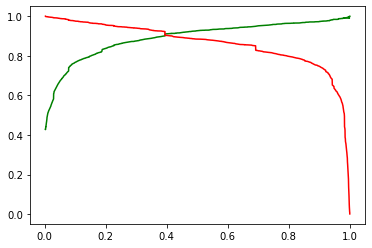

In [144]:
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_pred)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 92%, 93% and 92% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is more than 80%
- Hence overall this model seems to be excellent.   

## ----------------------------------------------------- THE END ------------------------------------------------------------